### In 'chips.tsv' dataset

In [1]:
import pandas as pd
df = pd.read_csv("../data/chips.tsv",sep="\t")
df

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]     $3.39   
2                                               [Apple]     $3.39   
3                                                   NaN     $2.39   
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
...                                                 ...        ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...    $11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...    $11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...    $11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...     $8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...     $8.75   

[4622 rows x 5 columns]

### What is the quantity of most expensive item ordered

### METHOD 1

In [2]:
def to_float(x):
    return float(x[1:])

In [3]:
t = to_float('$10.2')
type(t)

float

In [4]:
df["updated_price"]=df.item_price.apply(to_float)
df.head(2)

order_id  quantity                     item_name choice_description  \
0         1         1  Chips and Fresh Tomato Salsa                NaN   
1         1         1                          Izze       [Clementine]   

  item_price  updated_price  
0     $2.39            2.39  
1     $3.39            3.39

In [5]:
df.updated_price.max()

44.25

In [6]:
df[df.updated_price==df.updated_price.max()].quantity

3598    15
Name: quantity, dtype: int64

### METHOD 2

In [7]:
# df['item_name']=df.item_name.str.upper()
# df.head(2)

In [8]:
df['item_price']=df.item_price.str.replace("$","").astype('float')
df[df.item_price==df.item_price.max()].quantity

<ipython-input-8-84df6727edf8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['item_price']=df.item_price.str.replace("$","").astype('float')


3598    15
Name: quantity, dtype: int64

### How many times were a Veggie Salad Bowl ordered

In [9]:
df[df.item_name=="veggie salad bowl"]

Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price, updated_price]
Index: []

In [16]:
df[df.item_name.str.contains("veggie salad bowl",case=False)].shape

(18, 6)

### How many times peole ordered more than one Canned Soda

In [18]:
df[df.item_name.str.contains("canned soda",case=False)&(df.quantity>1)].shape

(20, 6)

### In 'user.txt' dataset

In [24]:
users = pd.read_csv('../data/user.txt',sep="|")
users.head(2)

user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043

### Calculate occupation's average age

In [57]:
gr=users.groupby('occupation')
gr.age.mean()[:2]

occupation
administrator    38.746835
artist           31.392857
Name: age, dtype: float64

## Find the male ratio per occupation

In [56]:
users.occupation.value_counts()[:2]

student    196
other      105
Name: occupation, dtype: int64

In [48]:
ls = []
for occ in users.occupation.unique():
    d = [occ, users[(users.occupation==occ)&(users.gender=="M")].shape[0], 
         users[(users.occupation==occ)&(users.gender=="F")].shape[0]]
    ls.append(d)

In [58]:
mydf = pd.DataFrame(ls,columns=["Occupation","M","F"]).set_index("Occupation")
mydf.head(2)

M   F
Occupation        
technician  26   1
other       69  36

In [51]:
import numpy as np
mydf["Male Raio (%)"]=np.round(mydf.M/(mydf.M+mydf.F),2)
mydf.head()

M   F  Male Raio (%)
Occupation                          
technician     26   1           0.96
other          69  36           0.66
writer         26  19           0.58
executive      29   3           0.91
administrator  43  36           0.54

In [55]:
69/(69+36)

0.6571428571428571

### Calculate Min and Max age per occupation

In [61]:

group = users.groupby("occupation")
minmax= pd.DataFrame({"MIN":group.age.min(),"MAX":group.age.max()})
minmax.head()

MIN  MAX
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70

### Display the percentage of male and female in each occupation in DF

In [68]:
perc = []
for occ in users.occupation.unique():
    m = users[(users.occupation==occ)&(users.gender=="M")].shape[0]
    f = users[(users.occupation==occ)&(users.gender=="F")].shape[0]
    male_ratio = 100*(m/(m+f))
    female_ratio = 100*(f/(m+f))
    perc.append([occ,male_ratio,female_ratio])

In [72]:
per_dataset = pd.DataFrame(perc,columns=["Occupation","Male (%)", "Female (%)"]).set_index("Occupation")
per_dataset.head()

Male (%)  Female (%)
Occupation                          
technician     96.296296    3.703704
other          65.714286   34.285714
writer         57.777778   42.222222
executive      90.625000    9.375000
administrator  54.430380   45.569620

### Data Visualization

<AxesSubplot:xlabel='Occupation'>

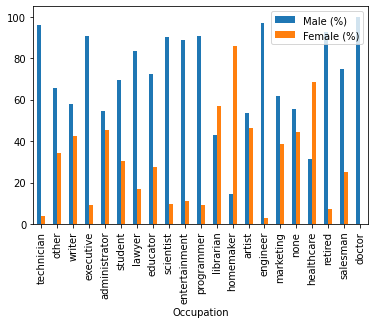

In [75]:
per_dataset.plot(kind='bar')